In [4]:
import numpy as np
import pandas as pd

In [170]:
##read in data
data = pd.read_csv("rideshare_kaggle.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [175]:
data.shape

(693071, 69)

In [176]:
data.nunique()

id                    693071
timestamp              36179
hour                      24
day                       17
month                      2
                       ...  
 Overcast                  1
 Light Rain                1
 Foggy                     1
 Possible Drizzle          1
 Drizzle                   1
Length: 69, dtype: int64

In [166]:
data.isna().sum().any()

True

In [167]:
data = data.dropna()

## Data Cleaning

We want to fit a model to predict ride price. Our theory is that the distance, hour of the day, day of the week(Fri,Sat,Sun or others), weather, type of the ride will impact the price and before doing so we want to change the categorical varibale of interest into a few dummy valiables for each category. 

In [172]:
##change day of the week to binary variables
weekday = data.datetime.apply(lambda x: datetime.fromisoformat(str(x)).weekday())
data['Fri'] = (weekday==4).astype(int)
data['Sat'] = (weekday==5).astype(int)
data['Sun'] = (weekday==6).astype(int)

In [173]:
##change short summry of weather to binary variables
print(data.short_summary.unique())
for i in data.short_summary.unique():
    data[i] = (data.name == i).astype('int')

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [184]:
## split data for uber and lyft
lyft = data[:][data.cab_type == "Lyft"]
uber = data[:][data.cab_type == "Uber"]

In [185]:
print(lyft.product_id.unique())
print(lyft.name.unique())
print(uber.product_id.unique())
print(uber.name.unique())

['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux']
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black']
['6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']
['UberXL' 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']


In [186]:
pd.crosstab(lyft.product_id,lyft.name)

name,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared
product_id,,,,,,
lyft,0,0,0,51235,0,0
lyft_line,0,0,0,0,0,51233
lyft_lux,0,51235,0,0,0,0
lyft_luxsuv,0,0,51235,0,0,0
lyft_plus,0,0,0,0,51235,0
lyft_premier,51235,0,0,0,0,0


In [187]:
pd.crosstab(uber.product_id,uber.name)

name,Black,Black SUV,Taxi,UberPool,UberX,UberXL,WAV
product_id,,,,,,,
55c66225-fbe7-4fd5-9072-eab1ece5e23e,0,0,0,0,55094,0,0
6c84fd89-3f11-4782-9b50-97c468b19529,55095,0,0,0,0,0,0
6d318bcc-22a3-4af6-bddd-b409bfce1546,0,55096,0,0,0,0,0
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0,0,0,0,0,55096,0
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,0,0,55095,0,0,0,0
997acbb5-e102-41e1-b155-9df7de0a73f2,0,0,0,55091,0,0,0
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,0,0,0,0,0,0,55096


We see that the product id and name are same variable with different representations in both uber and lyft. Then #Creat dummy variables for lyft and uber cab type

In [188]:
#Creat biary variables for uber and lyft cab type
for i in lyft.name.unique():
    lyft[i] = (lyft.name == i).astype('int')

for i in uber.name.unique():
    uber[i] = (uber.name == i).astype('int')

In [189]:
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

No handles with labels found to put in legend.


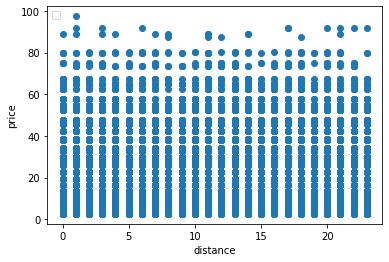

In [190]:
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


x = lyft['hour']
y = lyft['price']
# s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y)
# plt.scatter(x, y, s, c="g", alpha=0.1)
plt.xlabel("distance")
plt.ylabel("price")
plt.legend(loc='upper left')
plt.show()

In [202]:
lyft_X = lyft[['distance','Fri', 'Sat','Sun','Shared', 'Lux', 'Lyft',
               'Lux Black XL', 'Lyft XL', 'Lux Black',
               ' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
               ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
               ' Drizzle ',
               'surge_multiplier']]
lyft_y = lyft['price']

lyft_X_train, lyft_X_test, lyft_y_train, lyft_y_test = train_test_split(
    lyft_X, lyft_y, test_size=0.20, random_state=325)


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(cv=cv)

#fit model
model.fit(lyft_X_train, lyft_y_train)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.003923518277292391


In [203]:
print('train score is', model.score(lyft_X_train,lyft_y_train))
print('test score is', model.score(lyft_X_test,lyft_y_test))

train score is 0.9364751179926376
test score is 0.9363189596699775


In [206]:
coeffs = pd.concat([pd.Series(lyft_X_train.columns), pd.Series(model.coef_)], axis=1)
coeffs.columns = ['Variable','Coefficient']
coeffs

,Variable,Coefficient
0,distance,3.238986
1,Fri,0.000000
2,Sat,0.000000
3,Sun,0.000000
4,Shared,-11.031833
5,Lux,0.000000
6,Lyft,-8.129218
7,Lux Black XL,14.552752
8,Lyft XL,-2.426585
9,Lux Black,5.302515


We see that both day of the week and weather variable are in significant in predicting price.

In [209]:
final_predictors = lyft_X_train.columns[model.coef_ != 0]
final_predictors

Index(['distance', 'Shared', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'surge_multiplier'],
      dtype='object')

In [70]:
lyft_X.describe()

,hour,day,month,lyft_line,lyft_premier,lyft,lyft_luxsuv,lyft_plus,lyft_lux,Shared,Lux,Lyft,Lux Black XL,Lyft XL,Lux Black,distance,surge_multiplier
count,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.00000
mean,11.628920,17.773477,11.587112,0.166661,0.166668,0.166668,0.166668,0.166668,0.166668,0.166661,0.166668,0.166668,0.166668,0.166668,0.166668,2.186976,1.03127
std,6.955654,9.991441,0.492354,0.372674,0.372680,0.372680,0.372680,0.372680,0.372680,0.372674,0.372680,0.372680,0.372680,0.372680,0.372680,1.086622,0.13561
min,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390000,1.00000
25%,6.000000,13.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000,1.00000
50%,12.000000,17.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.140000,1.00000
75%,18.000000,28.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.970000,1.00000
max,23.000000,30.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.330000,3.00000


In [66]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha = 0.1)
clf.fit(X,Y)

Lasso(alpha=0.1)

In [67]:
clf.score(X,Y)

0.1255817413237349

In [47]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd9847e1b90> (for post_execute):


KeyboardInterrupt: 

No handles with labels found to put in legend.


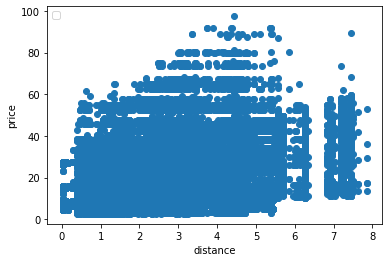

In [16]:
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


x = clean_data['distance']
y = clean_data['price']
# s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y)
# plt.scatter(x, y, s, c="g", alpha=0.1)
plt.xlabel("distance")
plt.ylabel("price")
plt.legend(loc='upper left')
plt.show()

In [55]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu